In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from scipy import stats

In [2]:
I = {'x': [10,8,13,9,11,14,6,4,12,7,5], 'y': [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]}
II = {'x': [10,8,13,9,11,14,6,4,12,7,5], 'y': [9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]}
III = {'x': [10,8,13,9,11,14,6,4,12,7,5], 'y': [7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]}
IV = {'x': [8,8,8,8,8,8,8,19,8,8,8], 'y': [6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]}
dfI = pd.DataFrame(I)
dfII = pd.DataFrame(II)
dfIII = pd.DataFrame(III)
dfIV = pd.DataFrame(IV)
dfs = [dfI, dfII, dfIII, dfIV]

In [3]:
# calculate statistics for each dataset
info = pd.DataFrame()
for i in range(4):
    # add measures to info
    info.loc['set {}'.format(i+1), 'mean_x'] = dfs[i]['x'].mean().__round__(2)
    info.loc['set {}'.format(i+1), 'mean_y'] = dfs[i]['y'].mean().__round__(2)
    info.loc['set {}'.format(i+1), 'var_x'] = dfs[i]['x'].var().__round__(2)
    info.loc['set {}'.format(i+1), 'var_y'] = dfs[i]['y'].var().__round__(2)
    info.loc['set {}'.format(i+1), 'std_x'] = dfs[i]['x'].std().__round__(2)
    info.loc['set {}'.format(i+1), 'std_y'] = dfs[i]['y'].std().__round__(2)
    info.loc['set {}'.format(i+1), 'r²'] = (stats.pearsonr(dfs[i]['x'], dfs[i]['y'])[0] ** 2).__round__(2)
    info.loc['set {}'.format(i+1), 'cov'] = dfs[i]['x'].cov(dfs[i]['y']).__round__(2)


info.to_csv('stats.csv')



r^2 = 0.6665424595087752
covariance = 5.501000000000001
r^2 = 0.6662420337274844
covariance = 5.500000000000001
r^2 = 0.6663240410665595
covariance = 5.497000000000002
r^2 = 0.6667072568984652
covariance = 5.499


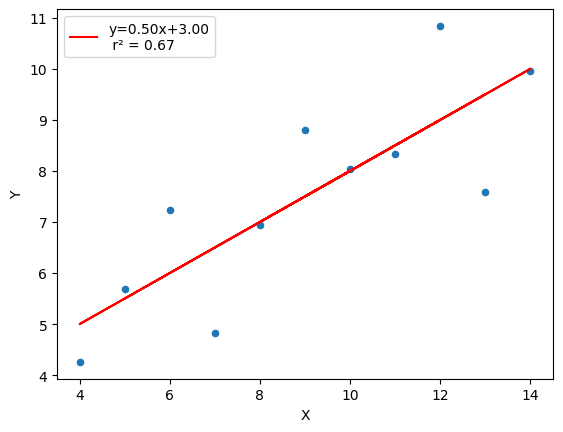

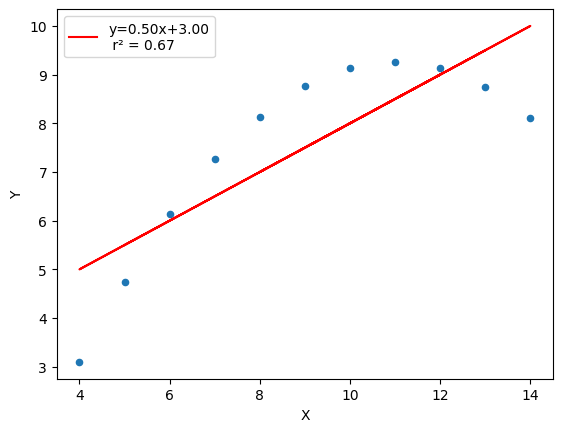

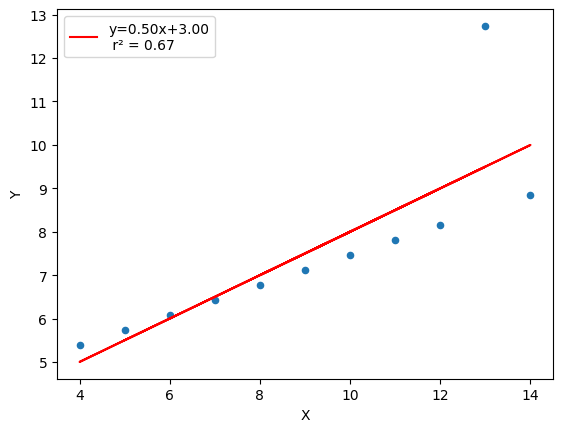

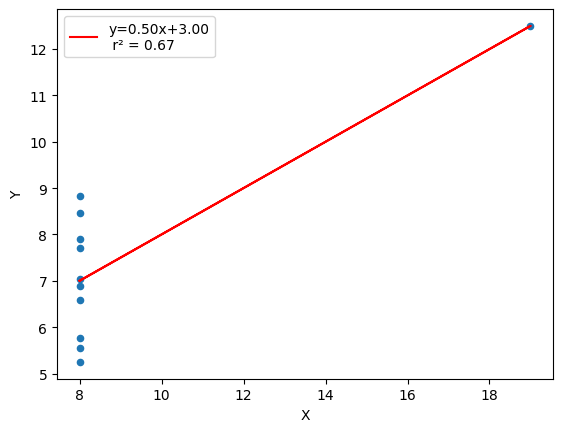

In [27]:
for i in range(4):
  # dfs[i].plot.scatter(x='x', y='y', title='Dataset {}: X Plotted Against Y with Lin. Reg.'.format(i+1))
  dfs[i].plot.scatter(x='x', y='y') # title in latex
  reg = np.polyfit(dfs[i]['x'], dfs[i]['y'], 1)
  # plt.text(0.5, 0.5, r'$R^2$ = {:.2f}'.format(stats.pearsonr(dfs[i]['x'], dfs[i]['y'])[0]**2), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
  print('r^2 = {}'.format(np.corrcoef(dfs[i]['x'], dfs[i]['y'])[0,1]**2))
  rval = stats.pearsonr(dfs[i]['x'], dfs[i]['y'])[0]
  plt.plot(dfs[i]['x'], np.polyval(reg, dfs[i]['x']), 'r', label='y={:.2f}x+{:.2f}\n r² = {:.2f}'.format(reg[0], reg[1], rval**2))

  # print covariences
  print('covariance = {}'.format(np.cov(dfs[i]['x'], dfs[i]['y'])[0,1]))

  plt.xlabel('X')
  plt.ylabel('Y')

  plt.legend()
  plt.savefig('dataset-{}.png'.format(i+1))

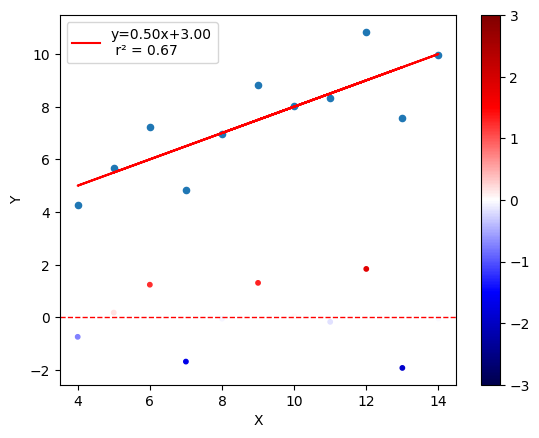

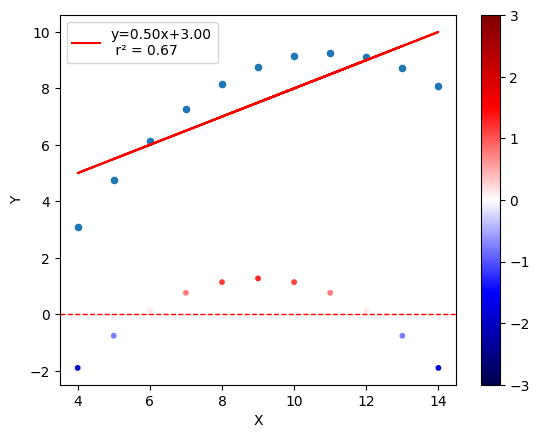

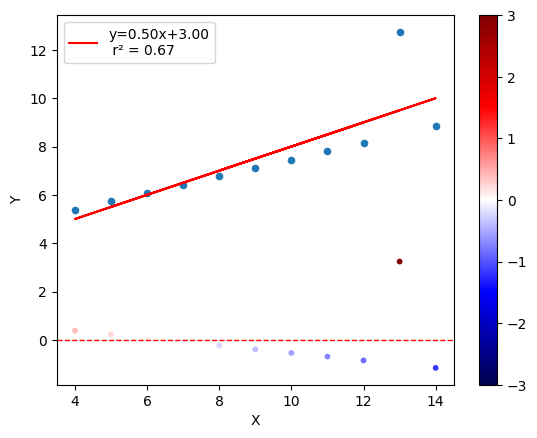

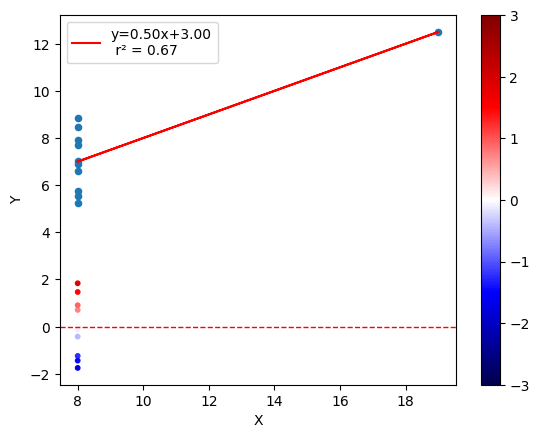

In [28]:
for i in range(4):
  # dfs[i].plot.scatter(x='x', y='y', title='Dataset {}: X Plotted Against Y with Lin. Reg.'.format(i+1))
  dfs[i].plot.scatter(x='x', y='y') # title in latex
  reg = np.polyfit(dfs[i]['x'], dfs[i]['y'], 1)

  rval = stats.pearsonr(dfs[i]['x'], dfs[i]['y'])[0]
  plt.plot(dfs[i]['x'], np.polyval(reg, dfs[i]['x']), 'r', label='y={:.2f}x+{:.2f}\n r² = {:.2f}'.format(reg[0], reg[1], rval**2))

  # plot residuals as small dots with color depending on magnitude with white being 0
  plt.scatter(dfs[i]['x'], dfs[i]['y'] - np.polyval(reg, dfs[i]['x']), c=(dfs[i]['y'] - np.polyval(reg, dfs[i]['x'])), cmap='seismic', vmin=-3, vmax=3,s=10)
  # add red dashed line at 0
  plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

  # add colorbar
  plt.colorbar()

  # plt.scatter(dfs[i]['x'], dfs[i]['y'] - np.polyval(reg, dfs[i]['x']), c='grey', s=10)




  plt.xlabel('X')
  plt.ylabel('Y')

  plt.legend()
  plt.savefig('dataset-res-{}.png'.format(i+1))